In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# change directories:
%cd /content/drive/MyDrive/Colab\ Notebooks
!pwd    # current working directory now changed
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks
 basic_operations.ipynb			     som_trained_data_02.pkl
 cnn_raw.py				     test_data_compressed.pkl
 colab_basics.ipynb			     train_data_compressed.pkl
 compressed_file.pkl			     trained_som.pkl
'Copy of 1_preprocessing_MJR - Copy.ipynb'   train_som_iteration_1_img.pkl
 DREAM_DATA_view.ipynb			     train_som_iteration_1.pkl
 DREAMER.mat				     train_som_iteration_2_img.pkl
 extracted_face_data			     train_som_iteration_2.pkl
 facrPsy_V7_trainTestSample.ipynb	     train_som_iteration_3_img.pkl
 facrPsy_V8_train_phase1.ipynb		     train_som_iteration_3.pkl
 probability_vectors.pkl		     Untitled
 som_trained_data_01.pkl		     unzip_files.ipynb


In [2]:
import pickle
import numpy as np
from skimage.color import rgb2gray
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:

extracted_data_path = './extracted_face_data/'

patient_id = ['P08', 'P08', 'P10', 'P10', 'P12', 'P12', 'P13', 'P13', 'P14', 'P15', 'P15', 'P16', 'P16', 'P17', 'P17', 'P18', 'P18', 'P19', 'P19', 'P20', 'P20', 'P21', 'P21', 'P23', 'P23', 'P24', 'P24', 'P25', 'P27', 'P28', 'P29', 'P29', 'P30', 'P30', 'P31', 'P31', 'P33', 'P33', 'P34', 'P35', 'P35', 'P36', 'P38', 'P38']
ground_truth = [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# List of file base names and sizes
data_name = [
    "data0_pP08_0", "data1_pP08_0", "data2_pP10_1", "data3_pP10_0", "data4_pP12_1",
    "data5_pP12_1", "data6_pP13_0", "data7_pP13_0", "data8_pP14_0", "data9_pP15_0",
    "data10_pP15_1", "data11_pP16_0", "data12_pP16_0", "data13_pP17_1", "data14_pP17_0",
    "data15_pP18_1", "data16_pP18_1", "data17_pP19_1", "data18_pP19_1", "data19_pP20_0",
    "data20_pP20_0", "data21_pP21_0", "data22_pP21_1", "data23_pP23_0", "data24_pP23_0",
    "data25_pP24_1", "data26_pP24_1", "data27_pP25_0", "data28_pP27_0", "data29_pP28_0",
    "data30_pP29_0", "data31_pP29_0", "data32_pP30_1", "data33_pP30_1", "data34_pP31_0",
    "data35_pP31_0", "data36_pP33_0", "data37_pP33_0", "data38_pP34_0", "data39_pP35_0",
    "data40_pP35_0", "data41_pP36_0", "data42_pP38_0", "data43_pP38_0"
]
data_size = [
    9875, 5900, 1638, 2542, 2036, 1085, 7532, 280, 10007, 3509, 2452, 11881, 10347,
    1119, 0, 3201, 3412, 465, 497, 2185, 1799, 2481, 2243, 3540, 3440, 5518, 2155,
    560, 4, 2890, 13038, 16197, 9036, 10052, 4108, 1423, 7039, 6073, 4153, 7687,
    7214, 9576, 3963, 1940
]


# compressing train_data (old)

In [ ]:
# open train data (old decompressed)
with open('/content/drive/MyDrive/Colab Notebooks/train_data_FP.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [ ]:
# compress the train_data
import pickle
import zlib

# Save with zlib compression
with open("train_data_compressed.pkl", "wb") as f:
    compressed = zlib.compress(pickle.dumps(train_data))
    f.write(compressed)

___

In [3]:
# @title file saver/opener
import pickle
import zlib

# Save to compressed file
def save_compressed(obj, filename):
    with open(filename, "wb") as f:
        compressed = zlib.compress(pickle.dumps(obj))
        f.write(compressed)


def load_compressed(filename):
    with open(filename, "rb") as f:
        compressed = f.read()
        return pickle.loads(zlib.decompress(compressed))


In [ ]:
# Examples

# Save the grayscaled, float32-compressed images
# save_compressed(som_train_img, "som_train_img_compressed.pkl")
# save_compressed(som_prj_img, "som_prj_img_compressed.pkl")

# som_train_img = load_compressed("som_train_img_compressed.pkl")
# som_prj_img = load_compressed("som_prj_img_compressed.pkl")

In [16]:
# @title loading train/test data
train_data = load_compressed("train_data_compressed.pkl")

In [ ]:
# test data
test_data = load_compressed("test_data_compressed.pkl")

In [ ]:
print(f"total train data: {len(train_data)}\n\n-----------------\n")
for name, data_dict in train_data:
    print(f"{name}, size: {len(data_dict['feature']['contours'])}")

total train data: 38

-----------------

dt_0_P08_0, size: 9875
dt_1_P08_0, size: 5900
dt_4_P12_1, size: 2036
dt_5_P12_1, size: 1085
dt_8_P14_0, size: 10007
dt_9_P15_0, size: 3509
dt_10_P15_1, size: 2452
dt_11_P16_0, size: 11881
dt_12_P16_0, size: 10347
dt_13_P17_1, size: 1119
dt_15_P18_1, size: 3201
dt_16_P18_1, size: 3412
dt_19_P20_0, size: 2185
dt_20_P20_0, size: 1799
dt_21_P21_0, size: 2481
dt_22_P21_1, size: 2243
dt_23_P23_0, size: 3540
dt_24_P23_0, size: 3440
dt_25_P24_1, size: 5518
dt_26_P24_1, size: 2155
dt_27_P25_0, size: 560
dt_29_P28_0, size: 2890
dt_30_P29_0, size: 13038
dt_31_P29_0, size: 16197
dt_32_P30_1, size: 9036
dt_33_P30_1, size: 10052
dt_34_P31_0, size: 4108
dt_35_P31_0, size: 1423
dt_36_P33_0, size: 7039
dt_37_P33_0, size: 6073
dt_38_P34_0, size: 4153
dt_39_P35_0, size: 7687
dt_40_P35_0, size: 7214
dt_41_P36_0, size: 9576
dt_42_P38_0, size: 3963
dt_43_P38_0, size: 1940
dt_6_P13_0, size: 7812
dt_17_P19_1, size: 962


In [ ]:
print(f"total test data: {len(test_data)}\n\n-----------------\n")
for name, data_dict in test_data:
    print(f"{name}, size: {len(data_dict['feature']['contours'])}")

total test data: 2

-----------------

dt_2_P10_1, size: 1638
dt_3_P10_0, size: 2542


In [17]:
# =====================================================================================================
# Step: 1, 2, 3
# =====================================================================================================

# ----------------------------  sample -> split: train, projection  ------------------------------------


# Step: 1, 2
def decide_sample_size(group_size):
    """
    Decide sample size based on group size.
    Returns (sample_size, train_split, projection_split).
    """
    if group_size < 500:
        return (0, 0, 0)
    elif group_size < 3000:
        return (500, 1, 0)
    elif group_size < 5000:
        return (1000, 1, 1)
    elif group_size < 7000:
        return (1500, 1, 2)
    elif group_size < 8000:
        return (2000, 2, 2)
    elif group_size < 11000:
        return (2500, 2, 3)
    elif group_size <= 20000:
        return (3000, 3, 3)
    else:
        n = round((0.15 * group_size) / 500)
        sample_size = n * 500
        if n % 2 == 0:
            return (sample_size, n // 2, n // 2)
        else:
            return (sample_size, (n - 1) // 2, (n + 1) // 2)



# train_data = [(name, dict)], m size list
# dict =
        # 'feature': {
        #     'contours': contours_list
        #     'au': au_list
        #     'landmarks': landmarks_list
        #     'headEulerAngle': headEulerAngle_list
        #     'classification': classification_list
        # },
        # 'ground_truth': 0 or 1


# make indices for sample
def sample_uniformly(size, num_samples=500):
    """
    Randomly selects 'num_samples' indices from the dataset in a uniform manner.

    Args:
        size (int): Total number of data points in the dataset.
        num_samples (int): Number of samples to select (default: 500).

    Returns:
        np.ndarray: An array of sampled indices.
    """
    # Ensure sample size doesn't exceed available data
    num_samples = min(size, num_samples)
    # Select 'num_samples' unique indices uniformly without a fixed seed within 'size'
    sampled_indices = np.random.choice(size, num_samples, replace=False)
    return sampled_indices


# get data from samples indexes
def get_sample_data(data_dict, sampled_indices):
    """
    Extracts a subset of data using sampled indices.

    Args:
        data_dict (dict): Dictionary containing 'feature' and its sub-keys.
        sampled_indices (list): List of sampled indices.

    Returns:
        dict: A new dictionary containing only the sampled data.
    """
    sampled_data = {
        'sample': sampled_indices,
        'feature': {
            'contours': [data_dict['feature']['contours'][i] for i in sampled_indices],
            'au': [data_dict['feature']['au'][i] for i in sampled_indices],
            'landmarks': [data_dict['feature']['landmarks'][i] for i in sampled_indices],
            'headEulerAngle': [data_dict['feature']['headEulerAngle'][i] for i in sampled_indices],
            'classification': [data_dict['feature']['classification'][i] for i in sampled_indices],
        },
        'ground_truth': data_dict['ground_truth']
    }
    return sampled_data


In [18]:

# --- {name: idx} dictionary  ---
# Build once, after train_data is loaded
name_to_index = {name: idx for idx, (name, _) in enumerate(train_data)}

def get_index_by_name(name):
    return name_to_index.get(name, -1)  # or raise an error if you prefer



In [19]:
# --- Sampling Loop ---
# store these idx in metadata
som_train_idx = []
som_prj_idx = []

# lists of tuples like [(name, sampled_indices)]
for name, data_dict in train_data:
    data_size = len(data_dict['feature']['contours'])
    _, num_train, num_prj = decide_sample_size(data_size)

    for _ in range(num_train):
        indices = sample_uniformly(data_size, 500)
        som_train_idx.append((name, indices.tolist()))

    for _ in range(num_prj):
        indices = sample_uniformly(data_size, 500)
        som_prj_idx.append((name, indices.tolist()))


In [9]:
len(som_train_idx[0][1])

500

In [20]:
for dt_nm, dt_idx in som_train_idx:
    print(f"{dt_nm}\t{dt_idx[:10]}")

dt_0_P08_0	[4280, 4345, 5526, 1569, 2906, 7521, 900, 2461, 4328, 6893]
dt_0_P08_0	[5391, 3857, 3362, 5783, 3974, 1115, 4295, 7395, 2077, 814]
dt_1_P08_0	[4282, 3587, 2353, 1358, 1996, 2393, 1288, 464, 3892, 5045]
dt_4_P12_1	[358, 38, 1715, 744, 224, 1097, 1221, 826, 1502, 1743]
dt_5_P12_1	[768, 302, 363, 866, 726, 560, 1048, 1005, 214, 529]
dt_8_P14_0	[8377, 2573, 6088, 1604, 5622, 7232, 2774, 5218, 2863, 2725]
dt_8_P14_0	[7395, 502, 1460, 9689, 4176, 6097, 4958, 5227, 775, 2345]
dt_9_P15_0	[2477, 2573, 875, 2083, 1041, 2732, 663, 3479, 703, 2023]
dt_10_P15_1	[590, 2034, 1581, 1044, 324, 690, 533, 771, 714, 2204]
dt_11_P16_0	[4938, 5326, 317, 4078, 3665, 10114, 9481, 4113, 581, 2114]
dt_11_P16_0	[6336, 10866, 2128, 1096, 1784, 6296, 10995, 7747, 11763, 10344]
dt_11_P16_0	[7722, 6151, 9043, 9436, 4284, 9233, 3862, 515, 10847, 9039]
dt_12_P16_0	[5111, 5169, 163, 1177, 2352, 4457, 502, 8513, 9474, 4126]
dt_12_P16_0	[3574, 6898, 10189, 5031, 8200, 6562, 5512, 7257, 588, 416]
dt_13_P17_1	[7

In [ ]:
# Step: 3
# ----  update "sample metadata" here  ----
# Store the "som metadata" after SOM & Vector

In [21]:
# @title Get Sample
# SAMPLE: getting samples using above som_train_idx and som_prj_idx
som_train_samples = []
som_prj_samples = []

for name, indices in som_train_idx:
    data_idx = get_index_by_name(name)
    nm, dt_dict = train_data[data_idx]
    som_train_samples.append((name, indices, get_sample_data(dt_dict, indices)))

for name, indices in som_prj_idx:
    data_idx = get_index_by_name(name)
    nm, dt_dict = train_data[data_idx]
    som_prj_samples.append((name, indices, get_sample_data(dt_dict, indices)))


In [22]:
# save the sample (to avoid colab runtime crushing), before "kernel restart-p1"
import pickle

# Group both sample lists into a dictionary
som_data = {
    'train_samples': som_train_samples,
    'prj_samples': som_prj_samples
}

# Save to a normal pickle
# with open('train_som_iteration_1.pkl', 'wb') as f:
#     pickle.dump(som_data, f)

# Save with zlib compression, pickle file
with open("train_som_iteration_3.pkl", "wb") as f:
    compressed = zlib.compress(pickle.dumps(som_data))
    f.write(compressed)


In [ ]:
# @title Restart RUNTIME/Kernel: part 1
import os
import sys

# This will crash the current runtime
os._exit(00)

In [4]:
# @title Reload SAMPLE
import pickle

som_data = load_compressed("train_som_iteration_3.pkl")

som_train_samples = som_data['train_samples']
som_prj_samples = som_data['prj_samples']


___
___


In [5]:

# =====================================================================================================
# Step: 4, 5, 6, 7, 8
# =====================================================================================================
# ----  sample contour and transform to image  ----
# do the same format using extracted som_train_samples, som_prj_samples:
    # som_train_contour = [(name, indices, contours_list_list)]
    # som_train_img = [(name, indices, img_lis)]
    # som_prj_contour = [(name, indices, contours_list_list)]
    # som_prj_img = [(name, indices, img_lis)]

    # use  som_train_samples, som_prj_samples to extract the contours
    # use convert_to_img(contours) to image conversion

# Define image size
image_size = 64

def convert_to_img(X):
    x_coords = np.array([point['x'] for point in X])
    y_coords = np.array([point['y'] for point in X])

    # Min-max scaling for x and y independently
    x_min, x_max = x_coords.min(), x_coords.max()
    y_min, y_max = y_coords.min(), y_coords.max()

    x_normalized = (x_coords - x_min) / (x_max - x_min)
    y_normalized = (y_coords - y_min) / (y_max - y_min)

    landmarks = np.column_stack((x_normalized, y_normalized))

    # Scale normalized landmarks to fit within the 64x64 image
    landmarks_scaled = np.round(landmarks * (image_size - 1)).astype(int)

    face_parts = [
        # ((0, 35), 'Face oval', (255, 255, 0, 128)),  # Yellow
        ((36, 40), 'Left eyebrow (top)', (0, 0, 255, 128)),  # Blue
        ((41, 45), 'Left eyebrow (bottom)', (0, 0, 255, 128)),
        ((46, 50), 'Right eyebrow (top)', (128, 0, 128, 128)),  # Purple
        ((51, 55), 'Right eyebrow (bottom)', (128, 0, 128, 128)),
        ((56, 71), 'Left eye', (255, 0, 0, 128)),  # Red
        ((72, 87), 'Right eye', (255, 0, 0, 128)),
        ((88, 96), 'Upper lip (bottom)', (255, 165, 0, 128)),  # Orange
        ((97, 105), 'Lower lip (top)', (255, 165, 0, 128)),
        ((106, 116), 'Upper lip (top)', (0, 255, 255, 128)),  # Cyan
        ((117, 125), 'Lower lip (bottom)', (0, 255, 255, 128)),
        ((131, 131), 'Left cheek (center)', (128, 128, 128, 128)),  # Gray
        ((132, 132), 'Right cheek (center)', (255, 192, 203, 128)),  # Pink
    ]

    # Create a blank RGBA image
    img = Image.new("RGBA", (image_size, image_size), (0, 0, 0, 0))
    draw = ImageDraw.Draw(img)

    for indices, label, color in face_parts:
        start, end = indices
        region_points = [(x, y) for x, y in landmarks_scaled[start:end + 1]]

        # Fill the polygon formed by the region points
        if len(region_points) > 2:  # At least 3 points required to form a polygon
            draw.polygon(region_points, fill=color)

    # Convert to numpy array and normalize to 0-1 range (RGB only)
    img_array = np.array(img)[:, :, :3] / 255.0  # Exclude alpha channel, normalize RGB
    return img_array


In [6]:
from skimage.color import rgb2gray
import numpy as np

som_train_img = []
som_prj_img = []

for name, indices, sample_dict in som_train_samples:
    contours_list = sample_dict['feature']['contours']

    # Convert contours to images and grayscale float32
    gray_list = [
        rgb2gray(np.array(convert_to_img(contour))).astype(np.float32)
        for contour in contours_list
    ]
    # som_train_img.append((name, indices, gray_list, contours_list))
    som_train_img.append((name, indices, gray_list))


for name, indices, sample_dict in som_prj_samples:
    contours_list = sample_dict['feature']['contours']

    # Convert contours to images and grayscale float32
    gray_list = [
        rgb2gray(np.array(convert_to_img(contour))).astype(np.float32)
        for contour in contours_list
    ]
    # som_prj_img.append((name, indices, gray_list, contours_list))
    som_prj_img.append((name, indices, gray_list))

# Note: contours, not included for minimal file size and minimum RAM load


In [7]:
print(len(som_prj_img))
print(len(som_prj_img[0]))
print(len(som_prj_img[0][0]))
print(len(som_prj_img[0][1]))   # 500 index
print(len(som_prj_img[0][2]))   # 500 64x64 image
print(som_prj_img[0][1][490:500])   # 500 index
print(len(som_prj_img[0][2][0]))   # 500 64x64 image
print(len(som_prj_img[0][2][0][2]))   # 500 64x64 image

49
3
10
500
500
[4176, 6264, 5726, 4807, 2639, 1002, 8479, 1549, 2686, 6254]
64
64


In [8]:
# save the image data for a iteration before "training" and "kernel restart-p2"
import numpy as np
from skimage.color import rgb2gray
import pickle
import zlib

# Dictionary of the data you want to save
image_data = {
    'train_img': som_train_img,
    'prj_img': som_prj_img
}

# Save with zlib compression
save_compressed(image_data, "train_som_iteration_3_img.pkl")


In [ ]:
# @title Restart RUNTIME/Kernel: part 2
import os
import sys

# This will crash the current runtime
os._exit(00)

In [4]:
som_img = load_compressed("train_som_iteration_3_img.pkl")

In [5]:
# reload the img list
som_train_img = som_img['train_img']
som_prj_img = som_img['prj_img']

___
___

In [ ]:
# @title compress the data using "zlib"
# saves the as is (not recomended)
with open("train_som_iteration_1_no_cmprs.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

In [ ]:
# saves the as compressed
with open("train_som_iteration_1_cmprs.pkl", "wb") as f:
    cmpr = zlib.compress(pickle.dumps(data_to_save))
    f.write(cmpr)

___
___

In [8]:
# list of tuple = (name, indices, gray_list)
len(som_train_img[0][2])

500

In [8]:
np_img = np.array(som_train_img[0][2][0])
print(np_img.shape)

(64, 64)


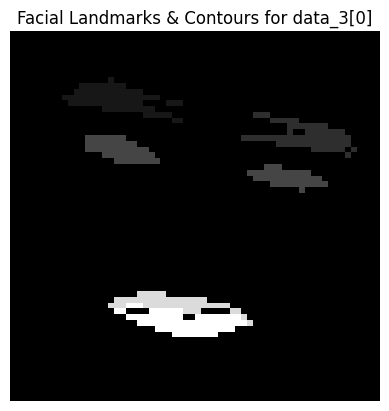

In [ ]:
# testing image conversion
imme = som_train_img[0][2][0]

# Display the image
plt.imshow(imme, cmap='gray')
plt.axis("off")
plt.title("Facial Landmarks & Contours for data_3[0]")
plt.show()

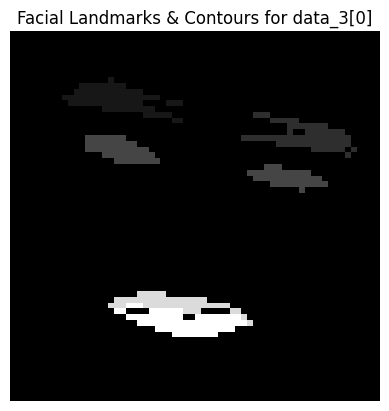

In [ ]:
# Display the image
plt.imshow(np_img, cmap='gray')
plt.axis("off")
plt.title("Facial Landmarks & Contours for data_3[0]")
plt.show()

In [ ]:
# How to Check if Normalization is Needed:
    # Normalize if the range is [0, 255].
    # Skip normalization if the values are already in [0, 1].

print(f"Min value: {np_img.min()}, Max value: {np_img.max()}")

Min value: 0.0, Max value: 0.7875000238418579


In [ ]:
X1_gray = np_img
# Examin the values
print(f"{X1_gray.shape}\n")
print(f"{X1_gray[0]}\n")
print(f"{X1_gray[21]}\n")
print(f"{X1_gray[32]}\n")
print(f"{X1_gray[48]}\n")
print(f"{X1_gray[63]}\n")

(64, 64)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.2125     0.2125
 0.2125     0.2125     0.2125     0.2125     0.2125     0.2125
 0.2125     0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14285804 0.
 0.         0.         0.         0.        ]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

# CHECKPONT: som training
___
___

In [6]:

#@title -------- Train the Uni-Ref-SOM --------

# --------  Install minisom if not already installed  --------
!pip install minisom

# Imports
import numpy as np
from minisom import MiniSom


In [7]:

# ------------------------  PART 1: train a reference SOM   ------------------------

# GOAL: Extract and combine all grayscale images from som_train_img
#       Combine all images (49 items × 500 = 24,500 images) and train a SOM to define universal clusters.
# Format: som_train_img = [(name, indices, [img1, img2, ..., img500]), ...]

# Step 1: Flatten the grayscale image data (64x64) to 1D vectors (4096)
flat_all = []

for name, indices, gray_images in som_train_img:
    for img in gray_images:
        flat_all.append(img.reshape(-1))  # shape becomes (4096,)

# Convert to NumPy array
flat_all = np.array(flat_all)  # shape: (total_samples, 4096)

# Optional: Check shapes
print("Total samples:", len(flat_all))
print("Each image vector shape:", flat_all.shape)


Total samples: 27000
Each image vector shape: (27000, 4096)


In [ ]:

# --------  Train universal SOM (e.g., 10x10 grid = 100 clusters)  --------
# "size" & "iteration" fixing for SOM neuron (TUNING 1):

# size: we set 11x11, considering 500 sample size for each individual
    #   i.e. 121 clusters for 500 individual, 1 node for 4 data-point
    #   because our goal was making a SOM for each sample of 500 data.
    #   5*sqrt(500) = 5*22.4 = 112 : 11*11 or 10*10

# iterations: we set initially 3000 (took 10s train), 7000(23s), 10000(36s), 60500 (240s), 70000(300s), 85000(347), 100000(400s)
# 123000 iteration, train time (540s)

som_universal = MiniSom(11, 11, input_len=flat_all.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som_universal.train_random(flat_all, num_iteration=123000)
# we used "random_seed=42" so that random weight initialization is fixed


In [8]:
# For TEST, small train
som_universal = MiniSom(11, 11, input_len=flat_all.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som_universal.train_random(flat_all, num_iteration=20000)

In [9]:

#@title Assign Clusters, Sample projection, probability vector creation

# ------------------------  PART 2: Project samples onto the Universal SOM   ------------------------
# PART 2 GOAL:
    # 1.    Project Individual Images onto the Universal SOM
    # 2.    Create a probability vector (stochastic vector) for each individual based on the number of images assigned to each cluster.


# Project Individual Images onto the Universal SOM
    # For each individual, map their images to the universal SOM's nodes to ensure consistent group labels.

def assign_clusters(images, som):
    # Flatten images (shape: 500, 64, 64) -> (500, 4096)
    flat_img = images.reshape(500, -1)

    # Assign clusters using the universal SOM (map each image to its best-matching SOM node)
    cluster_labels = np.array([som.winner(x) for x in flat_img])
    # Unique cluster IDs: Convert node coordinates to unique integers (e.g., (row*11 + col))
        # for 11x11 som the formula is: row * 11 + col
    cluster_ids = np.array([row * 11 + col for (row, col) in cluster_labels])

    # If your SOM size changes dynamically, use:
    # grid_size_x = som.x  # Number of columns
    # cluster_ids = np.array([row * grid_size_x + col for (row, col) in cluster_labels])

    # or
    # cluster_ids = np.array([row * som.x + col for (row, col) in cluster_labels])

    return cluster_ids


# NOTE: for a single input x, som.winner(x) returns only one pair of coordinates (row, col)
    # So cluster_labels in our code is a "list of (x, y) coordinate pairs", where:
        # x represents the "row index" of the SOM grid.
        # y represents the "column index" of the SOM grid.


In [13]:

# @title --------  cluster assign: preview  --------
# Task:
    # get the clusters for each of 49 items also
    # group the index of image according to clusters -> find the group of original indices
    # use "sampled indices"

# we'll test index 2 and 3 (i.e. items 3 & 4)
# dt_1_P08_0    [5726, 4170, 3715, 4093, 371, 4089, 4741, 3379, 3143, 3534]
# dt_4_P12_1    [1624, 1025, 474, 918, 75, 2018, 1374, 1593, 1686, 147]
# images = np.array(images)   # convert image to np-array

# Assign clusters for item 3
print(f"{som_train_img[2][0]}\t{som_train_img[2][1][:10]}")
item3_images = np.array(som_train_img[2][2])      # Shape (500, 64, 64)
item3_clusters_ids = assign_clusters(item3_images, som_universal)

# # Assign clusters for item 4
print(f"{som_train_img[3][0]}\t{som_train_img[3][1][:10]}")
item4_images = np.array(som_train_img[3][2])      # Shape (500, 64, 64)
item4_clusters_ids = assign_clusters(item4_images, som_universal)


dt_1_P08_0	[5726, 4170, 3715, 4093, 371, 4089, 4741, 3379, 3143, 3534]
dt_4_P12_1	[1624, 1025, 474, 918, 75, 2018, 1374, 1593, 1686, 147]


In [14]:
print(item3_images.shape)
print(item4_images.shape)

(500, 64, 64)
(500, 64, 64)


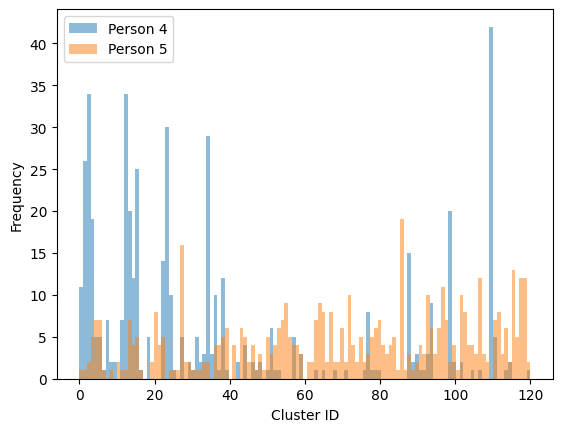

In [15]:
# Analyze Cluster Consistency
    # Check if the clusters for individual 4 align with those for individual 5
    # Visualize the clusters to ensure they group similar expressions across individuals.

import matplotlib.pyplot as plt

# Visualize cluster assignments for individual 0
plt.hist(item3_clusters_ids, bins=121, alpha=0.5, label='Person 4')
plt.hist(item4_clusters_ids, bins=121, alpha=0.5, label='Person 5')
plt.xlabel('Cluster ID')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [16]:

# @title ==================    vizualization    ===============================

import numpy as np
import matplotlib.pyplot as plt

# Unique colors for each person (red tint for Person 4, blue tint for Person 5)
# person 4's index is 3,  and person 5's index is 4
color_maps = {3: 'Reds', 4: 'Blues'}  # Individual 4 → Red, Individual 5 → Blue

# Store data separately for each person
individuals = {3: item3_images, 4: item4_images}
individual_cluster_ids = {3: item3_clusters_ids, 4: item4_clusters_ids}

# Define the total number of possible clusters (e.g., 121 for an 11x11 SOM)
n_possible_clusters = 121
num_persons = len(individuals)

# Step 1: Compute Prototypes & Cluster Data for Each Person for ALL possible clusters
prototypes = {}         # keys: (person_id, cluster_id)
cluster_counts = {}     # keys: (person_id, cluster_id)
cluster_images_dict = {}  # keys: (person_id, cluster_id)

for person_id in individuals:
    images = individuals[person_id]
    cluster_ids = individual_cluster_ids[person_id]
    # Determine image shape from the first image (assumes at least one image exists)
    image_shape = images[0].shape

    for cluster_id in range(n_possible_clusters):
        key = (person_id, cluster_id)
        # Check if this cluster exists in the current person's data
        if cluster_id in np.unique(cluster_ids):
            cluster_imgs = images[cluster_ids == cluster_id]
            # images: A NumPy array of shape (500, 64, 64) — contains 500 face images for a person.
            # cluster_ids: A NumPy array of shape (500,) — contains the SOM cluster ID (0–120) for each of those 500 images.
            # cluster_ids == cluster_id creates a boolean mask of shape (500,) [False, True, False, ..., True]
            # What images[mask] does: Selects the subset of images where the corresponding cluster_id matches the current cluster.
            prototype = np.mean(cluster_imgs, axis=0)
            prototypes[key] = prototype
            cluster_counts[key] = len(cluster_imgs)
            cluster_images_dict[key] = cluster_imgs # saves the cluster of images
        else:
            # For empty clusters, assign an empty (all-zero) image
            prototypes[key] = np.zeros(image_shape)
            cluster_counts[key] = 0
            cluster_images_dict[key] = np.empty((0, *image_shape))

# Determine maximum number of images in any cluster across all individuals
max_n = min(max(cluster_counts.values()), 10) if cluster_counts else 0
print(max_n)

10


In [ ]:
# Total columns: each cluster has one column per person
total_columns = n_possible_clusters * num_persons
total_rows = max_n + 1  # First row for prototypes

# Create a grid for visualization (adjust figsize as needed)
# To increase the size of the images in the visualization, modify the "figsize" parameter in the plt.subplots() function.
# currently 0.5 -> 2
fig, axes = plt.subplots(total_rows, total_columns, figsize=(total_columns * 1, total_rows * 1))

# Step 2: Visualize: For each possible cluster, show each person's prototype and images side by side
for cluster_id in range(n_possible_clusters):
    for person_id in individuals:
        col_idx = cluster_id * num_persons + person_id -3
        key = (person_id, cluster_id)
        cmap = color_maps[person_id]

        # Plot prototype in the first row
        axes[0, col_idx].imshow(prototypes[key], cmap=cmap)
        count = cluster_counts[key]
        axes[0, col_idx].set_title(f'P{person_id} C{cluster_id}\n(n={count})', fontsize=6)
        axes[0, col_idx].axis('off')

        # Plot each image below the prototype (or an empty image if none available)
        cluster_imgs = cluster_images_dict[key]
        for row_idx in range(max_n):
            ax = axes[row_idx + 1, col_idx]
            if row_idx < count:
                ax.imshow(cluster_imgs[row_idx], cmap=cmap)
            else:
                ax.imshow(np.zeros_like(prototypes[key]), cmap=cmap)
            ax.axis('off')

plt.tight_layout()
plt.show()


In [10]:

# @title ===============    probability (stochastic) vector & saving trained data    ===============

# probability_vectors contains the probability vector for each individual.
# Note: cluster_ids and person_clusters represent the same data: the cluster assignment for each image of a person.

import pickle
import numpy as np

n_clusters = 11*11

def compute_probability_vector(cluster_ids, n_clusters):
    """
    Compute both the normalized probability vector and the raw counts vector for an individual based on
    the number of images assigned to each cluster (from 0 to n_clusters-1).

    Parameters:
    - cluster_ids: a NumPy array of cluster IDs assigned to each image.
    - n_clusters: total number of possible clusters (e.g., 121 for an 11x11 SOM).

    Returns:
    - probability_vector: normalized counts (stochastic vector) of length n_clusters.
    - counts_vector: raw counts for each cluster, of length n_clusters.
    """
    sample_size = len(cluster_ids)  # Dynamic sample size
    counts_vector = np.zeros(n_clusters)  # Initialize raw counts with zeros for all clusters
    unique, counts = np.unique(cluster_ids, return_counts=True)  # Get unique cluster IDs and counts (Count occurrences per cluster)
    counts_vector[unique] = counts  # Assign counts to corresponding clusters (indices)
    probability_vector = counts_vector / sample_size  # Normalize by the sample size
    return probability_vector, counts_vector



# adjusted like below:
"""
                    Now here comes the fun part. Remember the structure of som_train_img?
                        We can now drop the images and store only the cluster_ids,
                        since we have the real image IDs.

                    now we'll do this for both som_train_img and som_prj_img parts

                    then we calculate the probability vectors (total 49+52, save the different 2d array)

                    save the som too.


                    So the new data format to save in file:
                    som_trained_data = {
                        'train_clustr': array of (name, real_500_idx, cluster_ids_500),
                        'prj_clustr': array of (name, real_500_idx, cluster_ids_500),
                        'pob_vec_train': probability_vectors,
                        'pob_vec_prj': probability_vectors,
                        'som_model': som_universal
                    }

"""


# Updated Code (post-SOM training, keep simple):
# -------- Convert som_train_img and som_prj_img to only cluster info --------

def convert_img_list_to_cluster_data(img_list, som_model):
    result = []
    for name, real_idx, images in img_list:
        images = np.array(images)
        cluster_ids = assign_clusters(images, som_model)
        result.append((name, real_idx, cluster_ids))
    return result


In [12]:
# Apply to both training and projection sets
train_cluster_data = convert_img_list_to_cluster_data(som_train_img, som_universal)
prj_cluster_data = convert_img_list_to_cluster_data(som_prj_img, som_universal)

In [11]:
# -------- Compute probability vectors for each individual --------
# use a list of tuples:     prob_vectors = [(name, prob_vec)]

def compute_all_probability_vectors(cluster_data, total_clusters=121):
    prob_vectors = []  # List of (name, prob_vector) tuples
    for name, real_indices, cluster_ids in cluster_data:
        prob_vec, _ = compute_probability_vector(cluster_ids, total_clusters)
        prob_vectors.append((name, prob_vec))
    return prob_vectors


In [13]:
# Compute separately for train and projection sets
prob_vec_train = compute_all_probability_vectors(train_cluster_data, n_clusters)
prob_vec_prj = compute_all_probability_vectors(prj_cluster_data, n_clusters)

In [14]:
# -------- Save all in one dictionary --------

som_trained_data = {
    'train_clustr': train_cluster_data,          # list of (name, real_500_idx, cluster_ids)
    'prj_clustr': prj_cluster_data,
    'pob_vec_train': prob_vec_train,
    'pob_vec_prj': prob_vec_prj,
    'som_model': som_universal
}

save_compressed(som_trained_data, "som_trained_data_03.pkl")

print(" SOM, clusters, and probability vectors saved to 'som_trained_data_xx.pkl'")


 SOM, clusters, and probability vectors saved to 'som_trained_data_xx.pkl'


In [15]:

# ===============    Load the SOM model and probability vector    ===============
import pickle

# Load the trained SOM model and probability vectors

som_trained_data = load_compressed("som_trained_data_03.pkl")

# Extract SOM model
som_model = som_trained_data['som_model']

# Preview loaded SOM model
print(f"SOM Model Loaded: {som_model}")
print(f"SOM Grid Size: {som_model._weights.shape[:2]}")  # Typically (11, 11)

# Preview a few cluster assignments (Train)
print("\n=== Sample of Cluster Assignments (Train) ===")
for name, real_ids, cluster_ids in som_trained_data['train_clustr'][:3]:
    print(f"Name: {name}")
    print(f"Real Image Indices (first 10): {real_ids[:10]}")
    print(f"Cluster IDs (first 10): {cluster_ids[:10]}")
    print("-" * 40)

# Preview a few cluster assignments (Project)
print("\n=== Sample of Cluster Assignments (Project) ===")
for name, real_ids, cluster_ids in som_trained_data['prj_clustr'][:3]:
    print(f"Name: {name}")
    print(f"Real Image Indices (first 10): {real_ids[:10]}")
    print(f"Cluster IDs (first 10): {cluster_ids[:10]}")
    print("-" * 40)

# Preview probability vectors - TRAIN
print("\n=== Probability Vectors (Train) ===")
for name, vec_data in som_trained_data['pob_vec_train'][:10]:
    print(f"Person: {name}\tLabel: {vec_data[:10]}\tSum: {vec_data.sum():.4f}, Min: {vec_data.min():.4f}, Max: {vec_data.max():.4f}")

print("-" * 40)

# Preview probability vectors - PROJECTED
print("\n=== Probability Vectors (Projected) ===")
for name, vec_data in som_trained_data['pob_vec_prj'][:10]:
    print(f"Person: {name}\tLabel: {vec_data[:10]}\tSum: {vec_data.sum():.4f}, Min: {vec_data.min():.4f}, Max: {vec_data.max():.4f}")

print("-" * 40)


SOM Model Loaded: <minisom.MiniSom object at 0x7a4aece01a50>
SOM Grid Size: (11, 11)

=== Sample of Cluster Assignments (Train) ===
Name: dt_0_P08_0
Real Image Indices (first 10): [4280, 4345, 5526, 1569, 2906, 7521, 900, 2461, 4328, 6893]
Cluster IDs (first 10): [ 54  76  55  97  73  60  98 112  63  32]
----------------------------------------
Name: dt_0_P08_0
Real Image Indices (first 10): [5391, 3857, 3362, 5783, 3974, 1115, 4295, 7395, 2077, 814]
Cluster IDs (first 10): [54 64 98 65 60 63 49 31 64 54]
----------------------------------------
Name: dt_1_P08_0
Real Image Indices (first 10): [4282, 3587, 2353, 1358, 1996, 2393, 1288, 464, 3892, 5045]
Cluster IDs (first 10): [59 42 42 63 65 43 11 69 22 24]
----------------------------------------

=== Sample of Cluster Assignments (Project) ===
Name: dt_0_P08_0
Real Image Indices (first 10): [6386, 7428, 4526, 9277, 6963, 1675, 2357, 3655, 6504, 6876]
Cluster IDs (first 10): [ 52 108  64  98  21  85  63  54  65  75]
-------------------